# Regression

### Notebook Content

### Hyperparameter Tuning
1. Random-Search-Cross-Validation
2. Bayesian-Optimization
3. Bayesian-optimization-using-hyperop
4. Bayesian-Optimization-using-Skopt

# Hyperparameter Tuning

# Grid Search
Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

It is important to note that Grid-searching can be extremely computationally expensive and may take your machine quite a long time to run. Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination.

**Note:** Here Grid search is demonstrated for only one model but it can be replicated across all the model with changing its respective hyperparameters


**Cross Validation**<br>
The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. When we approach a machine learning problem, we make sure to split our data into a training and a testing set. In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.


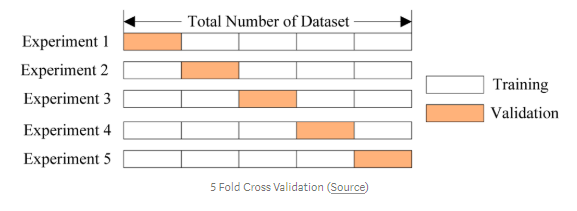

For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. This sounds like an awfully tedious process! Each time we want to assess a different set of hyperparameters, we have to split our training data into K fold and train and evaluate K times. If we have 10 sets of hyperparameters and are using 5-Fold CV, that represents 50 training loops.

In [75]:
# Same data used for gird search as used in Random For multiple linear regression 
# dataset = pd.read_csv('winequality-red.csv')
X_train.shape, y_train.shape, X_test.shape

((1279, 11), (1279,), (320, 11))

In [76]:
# PErforming Model without  Grid Search 

# Import RF Regressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)


# Now let's do prediction on test data.

y_pred_RF = rf.predict(X_test) 

In [77]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [78]:
# Create the parameter grid based 
# parameter value can be used according to data understanding 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100,500, 1000]
}

In [79]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.4min finished


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Random Search Cross Validation
Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 6, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 55, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations(n_iter), and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   17.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [82]:
rf_random.best_params_

{'n_estimators': 55,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Bayesian Optimization
A popular alternative to tune the model hyperparameters is Bayesian Optimization. Bayesian Optimization is a probabilistic model-based technique used to find minimum of any function. This approach can yield better performance on the test set while it requires fewer iterations than random search. It takes into account past evaluations when choosing the optimal set of hyperparameters. Thus it chooses its parameter combinations in an informed way. In doing so, it focus on those parameters that yield the best possible scores. Thus, this technique requires less number of iterations to find the optimal set of parameter values. It ignores those areas of the parameter space that are useless. Hence, it is less time-consuming and not frustrating at all.

Bayesian optimization is also called **Sequential Model-Based Optimization (SMBO)**. It finds the value that minimizes an objective function by building a surrogate function. A **surrogate function** is nothing but a probability model based on past evaluation results of the objective. In the surrogate function, the input values to be evaluated are selected based on the criteria of expected improvement. Bayesian methods use past evaluation results to choose the next input values. So, this method excludes the poor input values and limit the evaluation of the objective function by choosing the next input values which have done well in the past.

There are a number of Python libraries that enable us to implement Bayesian Optimization for machine learning models. The examples of libraries are **Spearmint, Hyperopt or SMAC**. Scikit-learn also provides a library named Scikit-optimize for Bayesian optimization.

Bayesian Optimization methods differ in how they construct the surrogate function. Spearmint uses Gaussian Process surrogate while SMAC uses Random Forest Regression. Hyperopt uses the Tree Parzen Estimator (TPE) for optimization.

## Bayesian optimization using hyperopt

### Objective function
The aim is to minimize the objective function. It takes in a set of values as input (in this case hyperparameters of GBM model) and outputs a real value to minimize - the cross validation loss.
We will write the objective function for the GBM model with 5-fold cross validation.

In the objective-function, cross-validation is done. Once the cross validation is complete, we get the mean score. We want a value to minimize. So, we take negative of score. This value is then returned as the loss key in the return dictionary.
The objective function returns a dictionary of values - loss and status.
Next, we define the domain space.


### Domain space
The domain space is the range of values that we want to evaluate for each hyperparameter.In each iteration of the search, the Bayesian optimization algorithm will choose one value for each hyperparameter from the domain space. In Bayesian optimization this space has probability distributions for each hyperparameter value rather than discrete values. When first tuning a model, we should create a wide domain space centered around the default values and then refine it in subsequent searches.

### Optimization algorithm
Writing the optimization algorithm in hyperopt is very simple. It just involves a single line of code. We should use the Tree Parzen Estimator (tpe). The best parameter using Hyperopt for DT is shown below:

In [85]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, Trials, tpe, STATUS_OK
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#!pip3 install scikit-optimize
#!pip3 install hyperopt
warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before")

data = pd.read_csv('dataset/weather.csv')
data = data.dropna()
X = data[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']]
y = data.MinTemp
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
def hyperopt_train_test(params):
    X_ = X[:]
    clf = DecisionTreeRegressor(**params)
#     cc = cross_val_score(clf, X, y).mean()
#     print(cc)
    return cross_val_score(clf, X, y).mean()
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["mse"])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:', best)
# print best

100%|█████████████████████████████████████████████| 300/300 [00:09<00:00, 31.25trial/s, best loss: 0.14782626484260714]
best: {'criterion': 0, 'max_depth': 3, 'max_features': 2}


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Bayesian Optimization using Skopt

Bayesian optimization using Gaussian Processes.

In [86]:
# import dataset
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

data = pd.read_csv('dataset/winequality-red.csv')
data = data.dropna()
X_ = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X = X_.to_numpy()
y_ = data.quality
y = y_.to_numpy()

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

In [87]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, 3, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [88]:
import numpy as np
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=0.4961'

In [89]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=4
- learning_rate=0.152645
- max_features=3
- min_samples_split=100
- min_samples_leaf=96


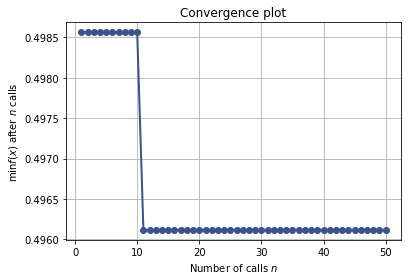

In [90]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>
